### Integrantes: Juan David Pérez Espitia - 202216446 & Juan Felipe Blanco Talero - 202225256
# Física Moderna: Proyecto Computacional 2

## Simulación Numérica de Funciones de Onda para el Átomo de Hidrógeno

Este proyecto tiene como objetivo construir numéricamente las funciones de onda del electrón en el potencial de Coulomb unidimensional (modelo simplificado del átomo de hidrógeno) utilizando la ecuación de Schrödinger independiente del tiempo. La simulación se basa en el método de disparo (*shooting method*) y la integración numérica para ajustar el valor de la energía hasta obtener una solución con la propiedad asintótica deseada.

## Fundamento Teórico

La **ecuación de Schrödinger independiente del tiempo** para un electrón en una dimensión se puede expresar como:

$$
-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + U(x)\psi(x) = E\psi(x)
$$

donde:
- $\psi(x)$ es la función de onda.
- $E$ es la energía (el valor propio que se busca para cada estado estacionario).
- $U(x)$ es la energía potencial.  
  En el caso del átomo de hidrógeno, el potencial de Coulomb para un electrón en presencia de un protón se aproxima como:
  
$$
U(x) = -\frac{D}{x}
$$

con $D$ siendo una constante relacionada a la fuerza de atracción electrostática.

### Método de Disparo (*Shooting Method*)

El método de disparo consiste en:
1. Iniciar la integración de la ecuación diferencial a partir de una posición cercana a \(x = 0\) (se evita el cero exacto para no enfrentarse a la singularidad del potencial).
2. Elegir condiciones iniciales, por ejemplo:
   - $\psi(0)=0$
   - $\psi'(0)=0.5$
3. Disparar (integrar) con un valor inicial de la energía $E$ y ajustar este valor de modo que, al integrar, la función de onda $\psi(x)$ cumpla la condición asintótica de decaer a medida que $x \to \infty$.

## Implementación del Código

El siguiente código en Python implementa la simulación utilizando el método de Euler para integrar la ecuación de Schrödinger. Además, se generan cuatro gráficos individuales, cada uno con un límite distinto en el eje $x$.

### Código en Python

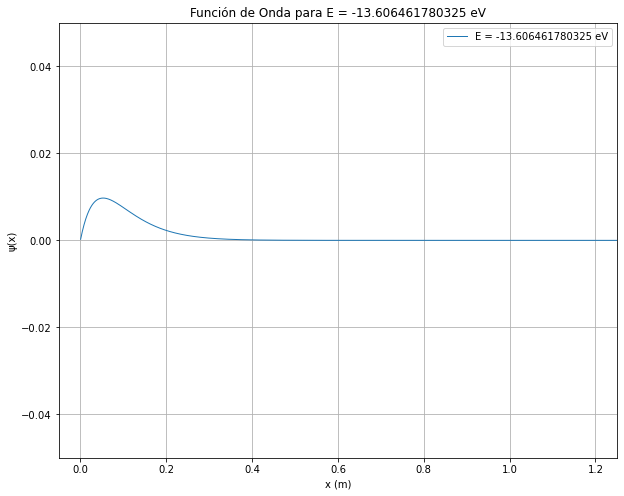

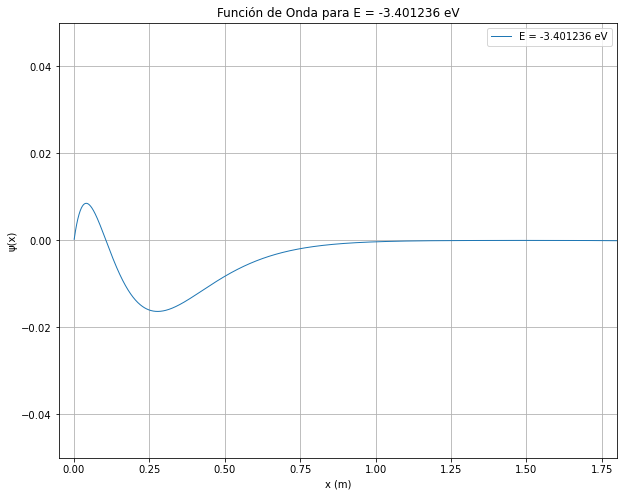

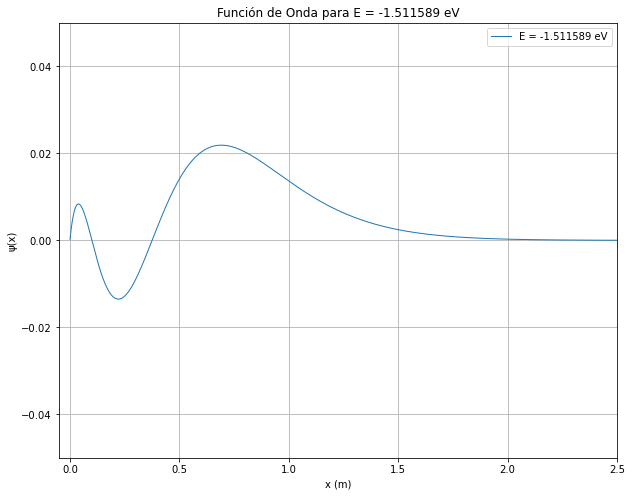

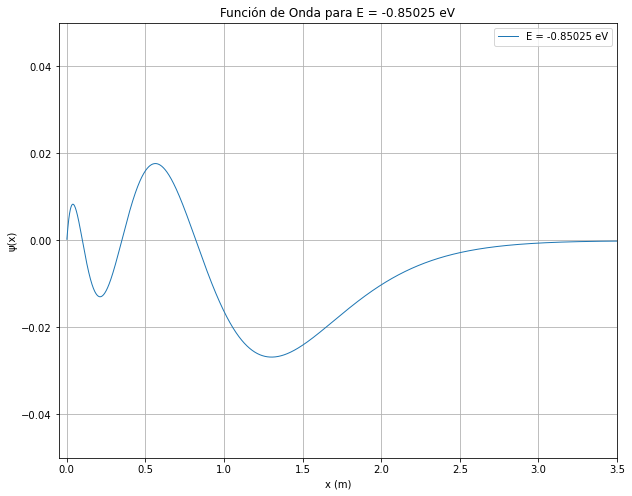

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

# Constantes
C = 26.24
D = 1.44
tiempo = np.linspace(0, 1000, 10000)
dx = 0.001

def potential_energy(x):
    # Se evita la singularidad en x=0; aunque se contempla que nunca se evalúa en exactamente 0
    return -D/x if x != 0 else 0

def wave_function(particle):
    history = []
    for i in range(len(tiempo)):
        x = particle["x"]
        yi_0 = particle["y_0"]
        yi_1 = particle["y_1"]

        # Se guarda el par (x, ψ)
        history.append([x, yi_0])
        
        E = particle["energy"]
        U = potential_energy(x)
        
        # Ecuación de Schrödinger reescrita en forma diferencial de 2º orden:
        y_2 = -C * (E - U) * yi_0
        y_1 = yi_1 + y_2 * dx
        y_0 = yi_0 + y_1 * dx
        
        particle["y_0"] = y_0
        particle["y_1"] = y_1 
        particle["x"] = x + dx
        
    particle["history"] = history
    return particle

def graphs(initial_conditions, energy_levels):
    # Para evitar problemas con la singularidad en x = 0, iniciamos la integración en x = dx/2
    x0 = dx/2  
    psi0 = initial_conditions[1] * x0  # Aproximación: ψ(x0) ≈ ψ'(0)*x0
    psi1 = initial_conditions[1]
    x_lims = [1.25, 1.8, 2.5, 3.5]
    
    for i, energy in enumerate(energy_levels):
        plt.figure(figsize=(10, 8))
        plt.title(f"Función de Onda para E = {energy} eV")
        plt.xlabel("x (m)")
        plt.ylabel("ψ(x)")
        plt.ylim(-10, 10)
        plt.xlim(-0.01, 10)
        plt.grid(True)
        
        # Definir la partícula con las condiciones iniciales modificadas
        particle = {
            "id": i,
            "x": x0,
            "energy": energy,
            "y_0": psi0,
            "y_1": psi1
        }
        
        particle = wave_function(particle)
        history = particle["history"]
        xs = [p[0] for p in history]
        ys = [p[1] for p in history]
        plt.plot(xs, ys, lw=1, label=f"E = {energy} eV")
        plt.legend()
        plt.ylim(-0.05, 0.05)
        plt.xlim(-0.05, x_lims[i])
        plt.show()

# Iniciación
initial_conditions = np.array([0, 0.5])  # [ψ(0), ψ'(0)]
energy_levels = np.array([-13.606461780325, -3.401236, -1.511589, -0.85025])

graphs(initial_conditions, energy_levels)


## Conclusiones

Con todo el desarollo efectuado es claro que se llegan a diferentes apreciaciones sobre los resultados. En particular, nos podemos referir a los patrones de las curvas para cada nivel de energía. Sabemos que tomando el valor absoluto de la función de onda, obtenemos una función de densidad de probabilidad que sigue un patrón con los mismos picos del estado del cuál proviene. Ahora, es claro que las curvas obtenidas siguen los patrones esperados. Esto respecto a la distancia más probable en la que se encuentra un electrón. Aún así, siendo más precisos podemos comentar que:
1. Para el estado de suelo, es claro que se tiene que el valor esperado de este estado sea aquel que tiene un menor valor. Es decir, es muy probable que el electrón este muy cerca del protón. 
2. Ahora, para el primer estado de excitación ya se logran ver dos puntos críticos. En particular, note que es más probable que el electrón se encuentre en la distancia del segundo punto crítico. A diferencia del estado de suelo, es menos probable que este más cerca del protón.
3. En este segundo estado de excitación ocurre un fenómeno similar pero ahora con tres cambios en la curva, lo que ofrece una perspectiva visual de tres regiones amontonadas, con distintos valores de probabilidad. No obstante, es más probable que el electrón se encuentre en esta tercera región más distante del protón.
4. Además, en esta ocasión se evidencian cuatro regiones acotadas por un cambio en la derivada de la curva. En este caso, y como se habrá deducido a partir de las otras explicaciones, se tiene que habrá una mayor probabilidad de encontrar al electrón en la distancia más lejana hasta el momento, ubicada en la última región.

De igual forma, incluso si se llegaron a cumplir los objetivos del proyecto computacional, se procuraría en un intento próximo utilizar métodos númericos más precisos que permitan cuantizar los resultados de manera más efectiva. Todo lo anterior, puesto que la convergencia de estos valores fue muy sensible a cambios en sus decimales, por lo cuál fue un trabajo díficil y extenuante. Por otro lado, creemos que una forma interesante de aproximarse a este problema puede ser a través de la utilización de programación orientada a objetos.